## Imports

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from datamanagement.imageprocessor import ImageProcessor

#### Global variables:

set ```SAVE_NPZ``` to True to process and save the images in ```.npz``` files. Leave False if you want to run the full notebook to test the stored ```.npz``` images against freshly loaded images using the ```surveyId``` values

In [2]:
SAVE_NPZ = False

#### Functions:

In [3]:
def get_list(is_train):
    path = f"data/GLC24_PA_metadata_{'train' if is_train else 'test'}.csv"
    return pd.read_csv(path)['surveyId'].unique().tolist()


Get a list of unique ID values from the ```surveyId``` values stored in the csv files

In [4]:
train_list = get_list(True)
test_list = get_list(False)

### Load in the images and combine the RGB and NIR for each ID value.
_Note: this process takes a few minutes (7:30 for me) and uses quite a large amount of memory (around 10gb)_

In [5]:
if SAVE_NPZ:
    processor = ImageProcessor(train_ids=train_list, test_ids=test_list)
    processor.process_list(use_train=True, use_test=True)

#### Unassign the processor variable to free up memory through the garbage collector

In [6]:
processor = None

### Load from the saved files to check them

In [7]:
filepath = "processed_images/train_rgbnir.npz"

In order to load the images properly the ```allow_pickle=True``` flag is required and ```["arr_0"]``` must be selected.

In [8]:
loaded_train_images = np.load(filepath, allow_pickle=True)["arr_0"]
loaded_train_images.shape

(88987, 128, 128, 6)

Get the first two images from the ```.npz``` file

In [9]:
first_two_images_loaded = loaded_train_images[:2]

# Free up memory
loaded_train_images = None

In [16]:
processor = ImageProcessor(train_ids=train_list[:2])
images_from_ids, _ = processor.process_list(save=False)

if (first_two_images_loaded == images_from_ids).all():
    print("Saved images match with freshly loaded images.")
else:
    print("Saved images do not match up with their ID values")

Saved images match with freshly loaded images.


### Accessing RGB and NIR from saved images:

For an array of images named ```array```  
-  The RGB values would be accessed with ```array[:, :, :, :3]```
-  The NIR values would be accessed with ```array[:, :, :, 3:]```

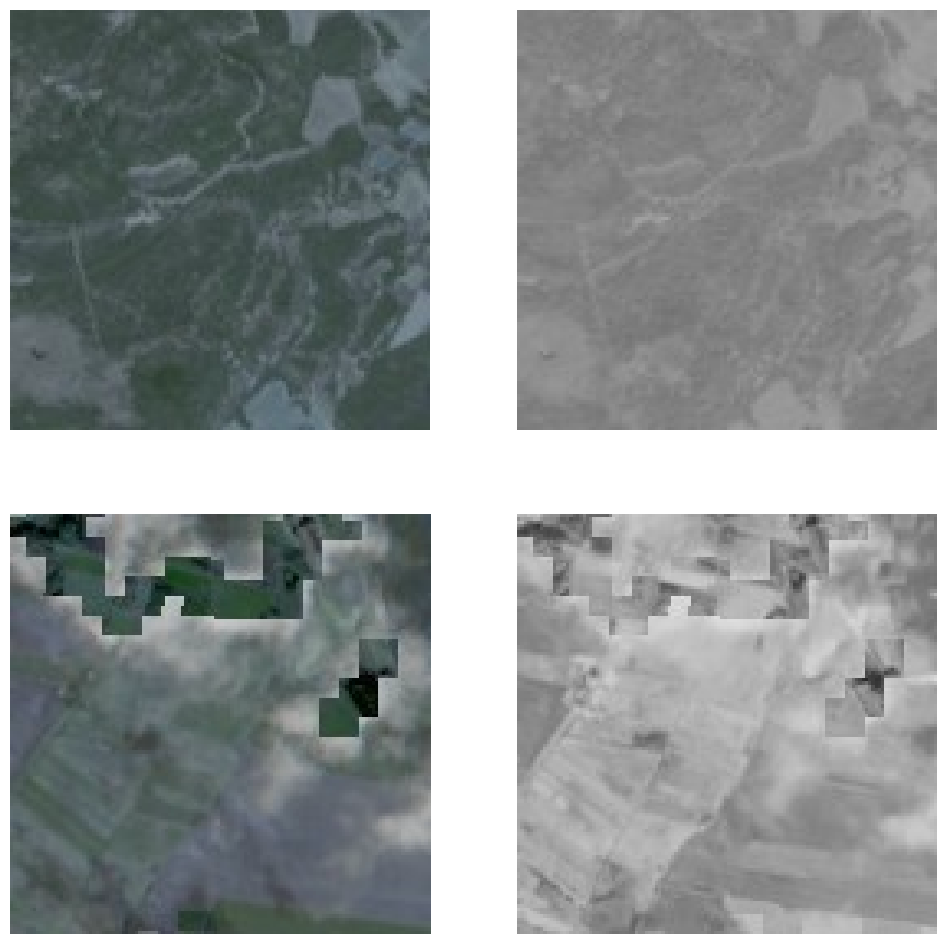

In [36]:
f, axarr = plt.subplots(2, 2, figsize=(12, 12))

for ii in [0, 1]:
    for jj in [0, 1]:
        axarr[ii, jj].imshow(images_from_ids[ii, :, :, 3 * jj : 3 * jj + 3])
        axarr[ii,jj].axis("off")

plt.show()
